In [48]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [109]:
df = pd.read_csv('datasets/wisconsin_breast_cancer_data_refined.csv')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_code
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,1.0
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,1.0
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.0
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,1.0
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.0


In [110]:
#Clean up diagnosis columns
df["diagnosis"] = df["diagnosis_code"]
df.drop(columns=['diagnosis_code'],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1.0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.0,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.0,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,1.0,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.0,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


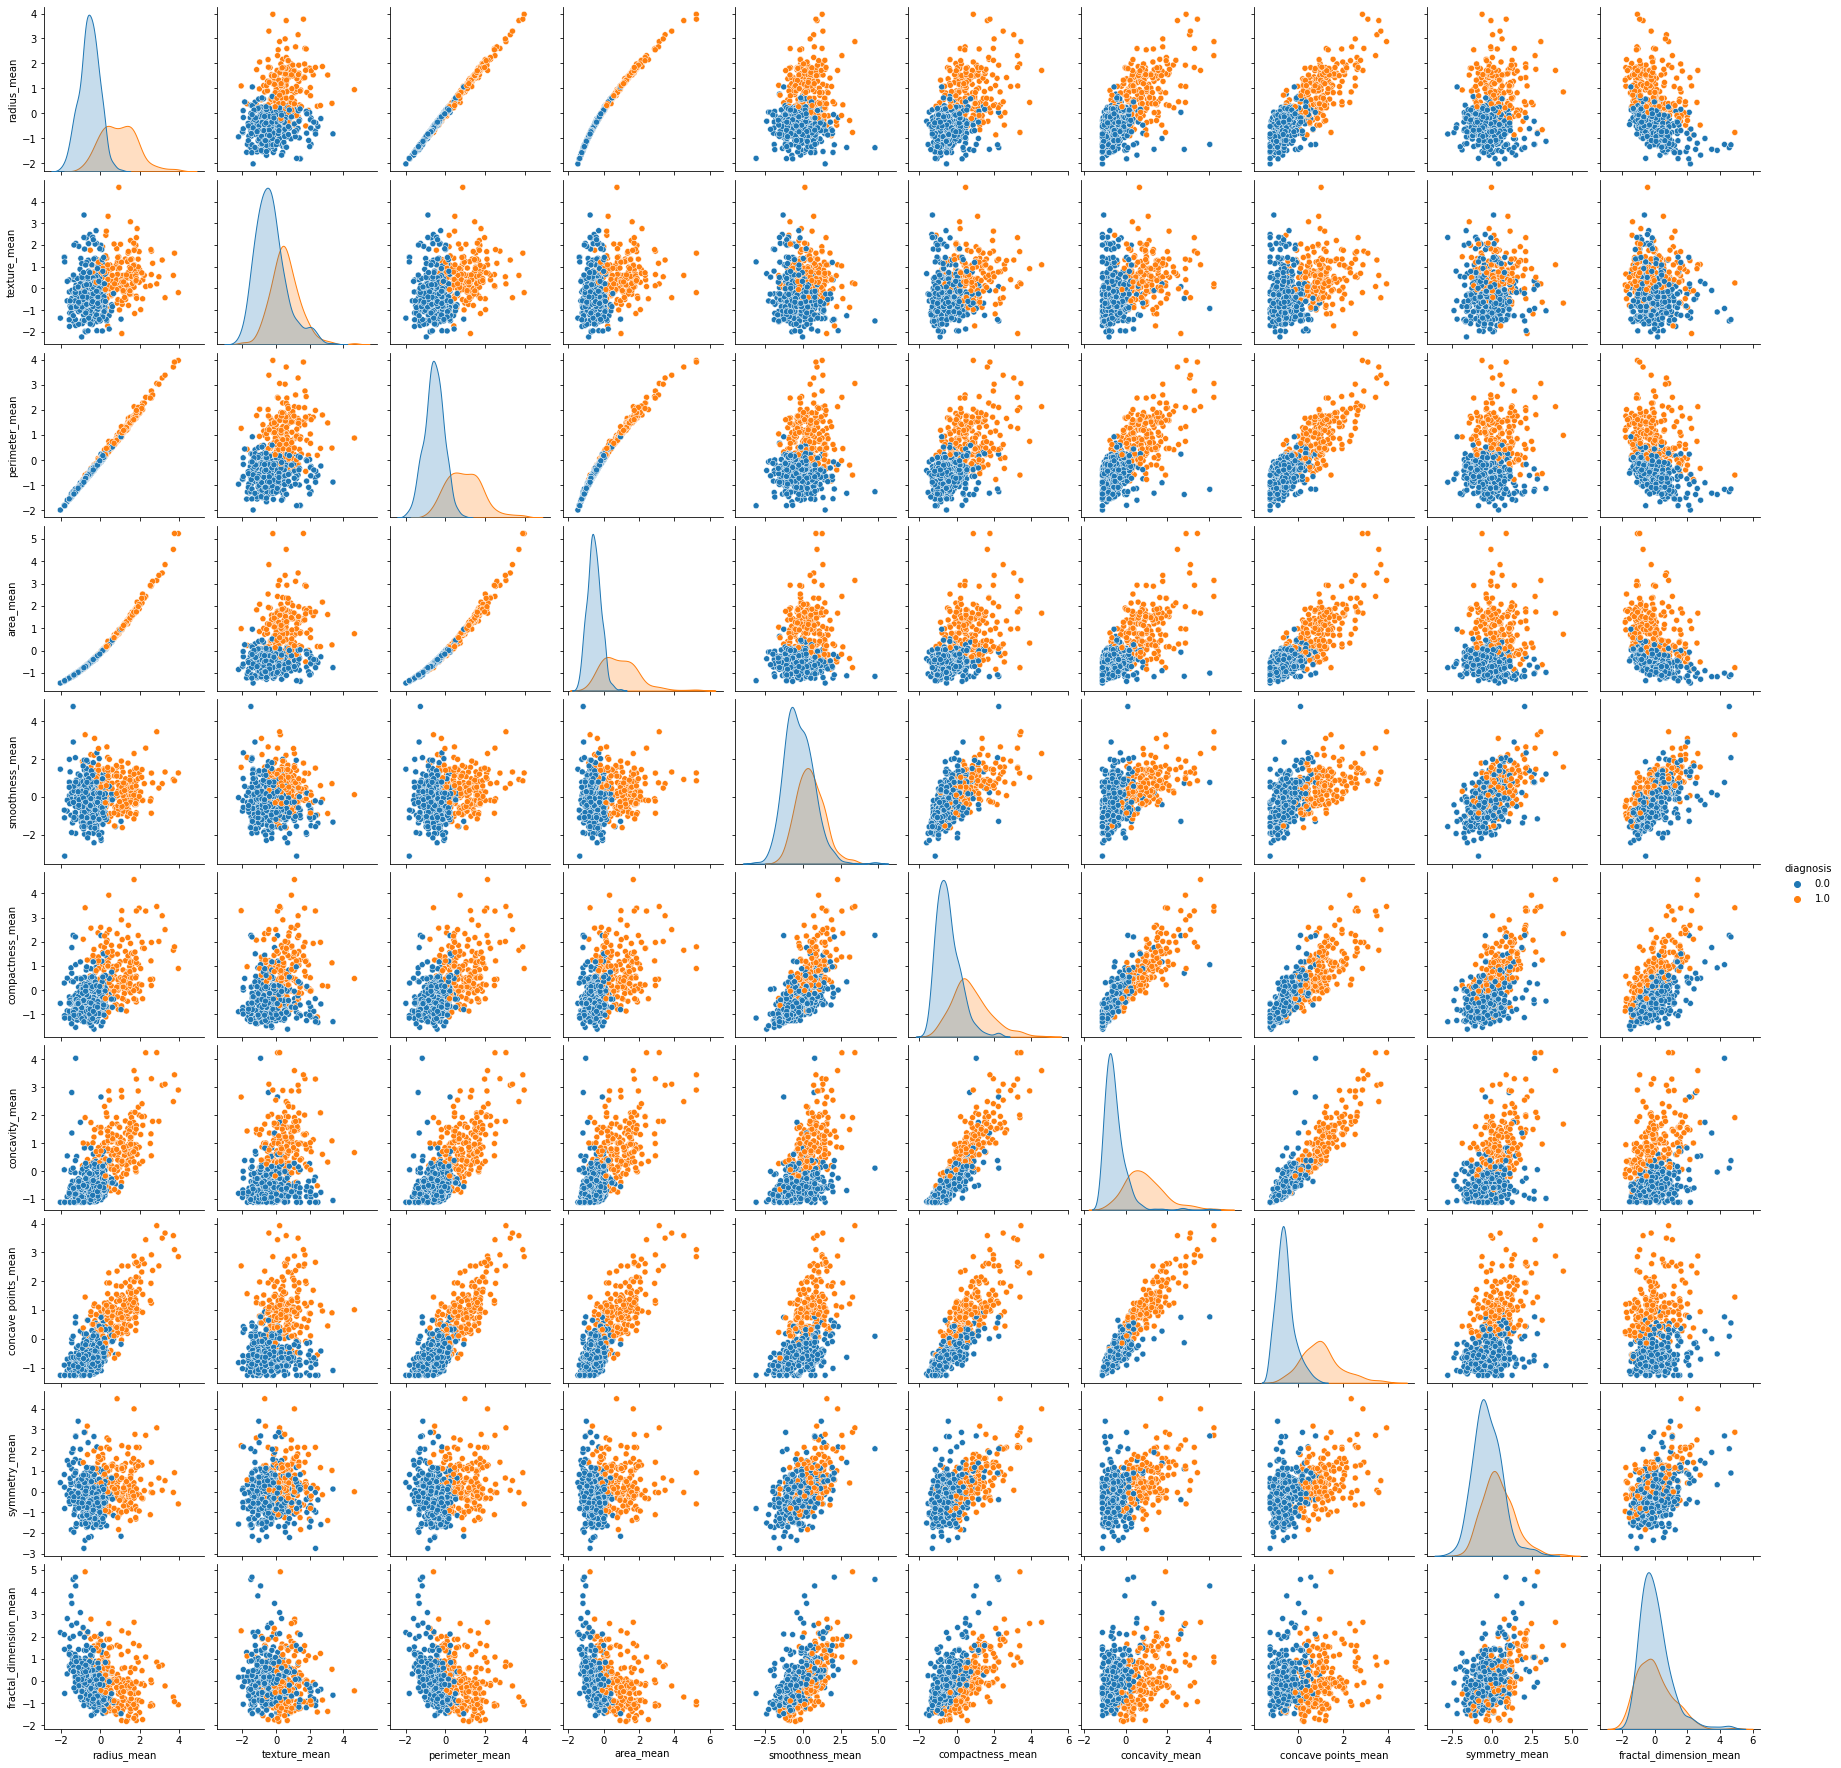

In [10]:
#Use seaborn to create pairplots, color coded by diagnosis
sns.pairplot(df,hue='diagnosis')

<AxesSubplot:>

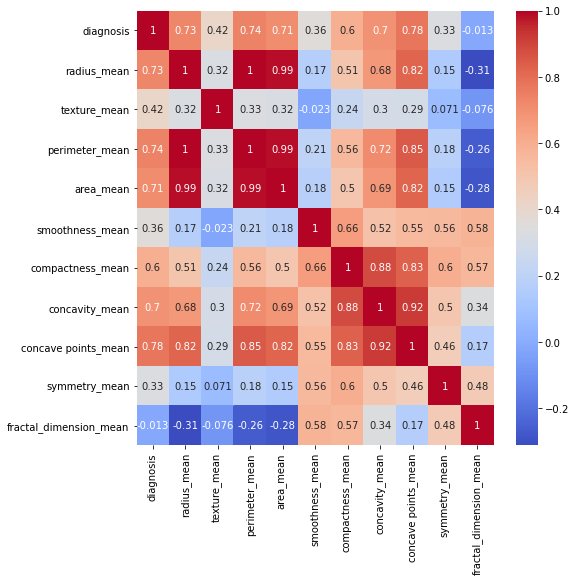

In [9]:
#Plot correlation heatmap
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cmap="coolwarm",annot=True)

In [31]:
#Select any feature with correlation >=0.5 with diagnosis
feature_names = []

for rows in np.arange(len(corr)):
    if corr.iloc[rows,0] >= 0.5:
        feature_names.append(corr.index.values[rows])


In [36]:
#Select features solely based on correlation to target (corr>5)
features = df[df.columns.intersection(feature_names)]
features.drop(columns=['diagnosis'],axis=1,inplace=True)
features.head()

/Users/switt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean
0,1.097064,1.269934,0.984375,3.283515,2.652874,2.532475
1,1.829821,1.685955,1.908708,-0.487072,-0.023846,0.548144
2,1.579888,1.566503,1.558884,1.052926,1.363478,2.037231
3,-0.768909,-0.592687,-0.764464,3.402909,1.915897,1.451707
4,1.750297,1.776573,1.826229,0.539340,1.371011,1.428493


### Reduced features dataset

In [37]:
#Define variables for classifcation
y = df["diagnosis"].values

x_columns = len(features.columns)
X = features.iloc[:,0:x_columns].values

In [38]:
#Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [39]:
#Split testing set into test and validation sets
X_validate, X_test, y_validate, y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=0)

#### KNN classifier

Text(0, 0.5, 'accuracy')

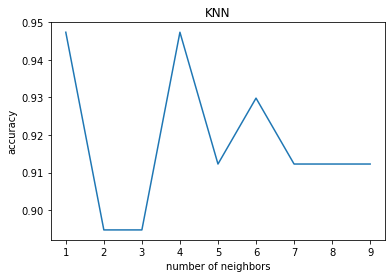

In [44]:
#Train KNN classifier, use test data to figure out optimal number of clusters (should be 2?)
scores = []
neighbors = range(1,10)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    results = knn.score(X_test,y_test)
    scores.append(results)

plt.plot(neighbors,scores)
plt.title('KNN')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')

In [45]:
#Choose KNN with n_neighbors = 4
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
result = knn.score(X_validate,y_validate)
print("Accuracy = ",result)

Accuracy =  0.9298245614035088


In [46]:
predictions = knn.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[34  1]
 [ 3 19]]


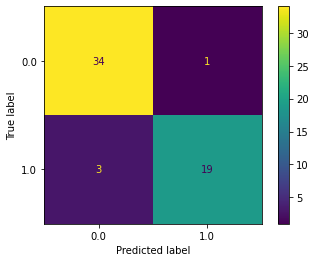

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_validate,predictions),display_labels=knn.classes_)
disp.plot()
plt.show()

#### SVC classifer

Text(0, 0.5, 'accuracy')

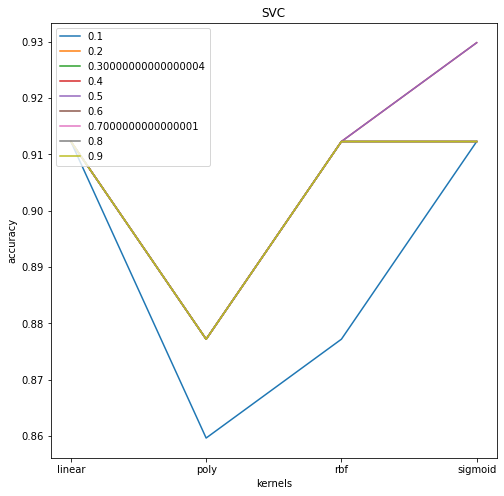

In [80]:
#Train SVC classifier, use test data to figure iterating over both regularization and kernels
scores = np.zeros([9,4])
regularization = np.arange(0.1, 1.0, 0.1)
kernels=['linear', 'poly', 'rbf', 'sigmoid']

for c in np.arange(len(regularization)):
    for k in np.arange(len(kernels)):
        svc = SVC(C=regularization[c],kernel=kernels[k],gamma='auto').fit(X_train,y_train)
        results = svc.score(X_test,y_test)
        scores[c,k]=results
        

plt.figure(figsize=(8,8))
for c in np.arange(len(regularization)):
    plt.plot(kernels,scores[c,:],label=regularization[c])
plt.title('SVC')
plt.legend(loc='upper left')
plt.xlabel('kernels')
plt.ylabel('accuracy')

In [82]:
#Best performing SVC seems to be kernel="sigmoid", C = 0.5
svc = SVC(C=0.5,kernel='sigmoid',gamma='auto').fit(X_train,y_train)
result = svc.score(X_validate,y_validate)
print("Accuracy = ",result)

Accuracy =  0.8947368421052632


In [83]:
predictions = svc.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[33  2]
 [ 4 18]]


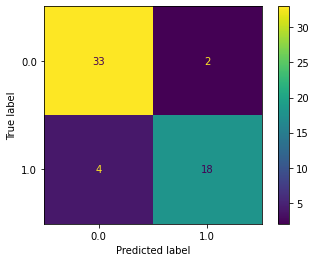

In [84]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_validate,predictions),display_labels=svc.classes_)
disp.plot()
plt.show()

#### Random Forest classifier

Text(0.5, 1.0, 'Random Forest Classifier')

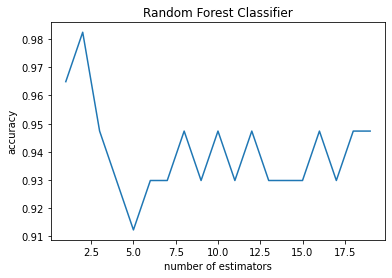

In [88]:
#Define Random Forest and estimate accuracy with number estimators
scores = []
num_estimators = range(1,20)

for n in num_estimators:
    forest = RandomForestClassifier(criterion='entropy', n_estimators = n, random_state=0)
    forest.fit(X_train, y_train)
    results = forest.score(X_test,y_test)
    scores.append(results)
    
plt.plot(num_estimators,scores)
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.title('Random Forest Classifier')

In [89]:
#Best performing forest has n_estimators=2
forest = RandomForestClassifier(criterion='entropy',n_estimators=2,random_state=0).fit(X_train,y_train)
result = forest.score(X_validate,y_validate)
print("Accuracy = ",result)

Accuracy =  0.9122807017543859


In [90]:
#Print confusion matrix using validation set
predictions = forest.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[35  0]
 [ 5 17]]


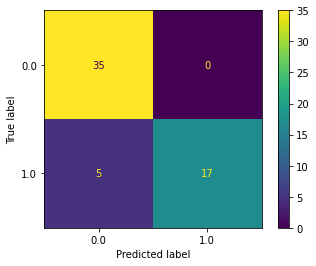

In [91]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_validate,predictions),display_labels=forest.classes_)
disp.plot()
plt.show()

### Reduced reduced features dataset

In [92]:
#A lot of features in the features dataset are highly intercorrelated.
features_reduced = df[["radius_mean","concavity_mean"]]
features_reduced.head()

,radius_mean,concavity_mean
0,1.097064,2.652874
1,1.829821,-0.023846
2,1.579888,1.363478
3,-0.768909,1.915897
4,1.750297,1.371011


In [93]:
#Define variables for classifcation
y = df["diagnosis"].values

x_columns = len(features_reduced.columns)
X = features_reduced.iloc[:,0:x_columns].values

In [94]:
#Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

#Split testing set into test and validation sets
X_validate, X_test, y_validate, y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=0)

Text(0, 0.5, 'accuracy')

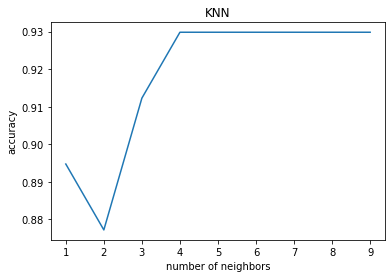

In [95]:
#Train KNN classifier, use test data to figure out optimal number of clusters (should be 2?)
scores = []
neighbors = range(1,10)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    results = knn.score(X_test,y_test)
    scores.append(results)

plt.plot(neighbors,scores)
plt.title('KNN')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')

In [96]:
#Choose KNN with n_neighbors = 4
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
result = knn.score(X_validate,y_validate)
print("Accuracy = ",result)

Accuracy =  0.9122807017543859


In [98]:
predictions = knn.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[34  1]
 [ 4 18]]


Text(0, 0.5, 'accuracy')

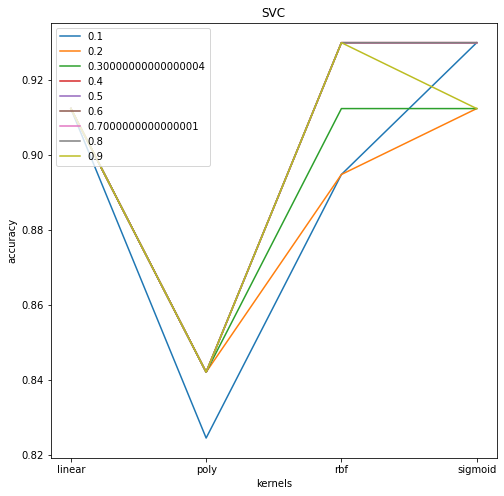

In [99]:
#Train SVC classifier, use test data to figure iterating over both regularization and kernels
scores = np.zeros([9,4])
regularization = np.arange(0.1, 1.0, 0.1)
kernels=['linear', 'poly', 'rbf', 'sigmoid']

for c in np.arange(len(regularization)):
    for k in np.arange(len(kernels)):
        svc = SVC(C=regularization[c],kernel=kernels[k],gamma='auto').fit(X_train,y_train)
        results = svc.score(X_test,y_test)
        scores[c,k]=results
        

plt.figure(figsize=(8,8))
for c in np.arange(len(regularization)):
    plt.plot(kernels,scores[c,:],label=regularization[c])
plt.title('SVC')
plt.legend(loc='upper left')
plt.xlabel('kernels')
plt.ylabel('accuracy')

In [100]:
#Best performing SVC seems to be kernel="rbf", C = 0.5
svc = SVC(C=0.5,kernel='rbf',gamma='auto').fit(X_train,y_train)
result = svc.score(X_validate,y_validate)
print("Accuracy = ",result)

Accuracy =  0.8947368421052632


In [101]:
predictions = svc.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[33  2]
 [ 4 18]]


Text(0.5, 1.0, 'Random Forest Classifier')

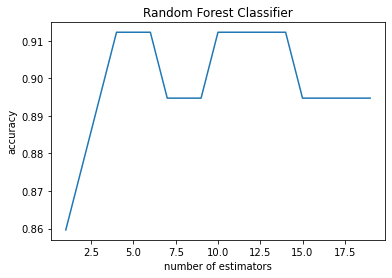

In [102]:
#Define Random Forest and estimate accuracy with number estimators
scores = []
num_estimators = range(1,20)

for n in num_estimators:
    forest = RandomForestClassifier(criterion='entropy', n_estimators = n, random_state=0)
    forest.fit(X_train, y_train)
    results = forest.score(X_test,y_test)
    scores.append(results)
    
plt.plot(num_estimators,scores)
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.title('Random Forest Classifier')

In [103]:
#Best performing forest has n_estimators=3
forest = RandomForestClassifier(criterion='entropy',n_estimators=3,random_state=0).fit(X_train,y_train)
result = forest.score(X_validate,y_validate)
print("Accuracy = ",result)

Accuracy =  0.8947368421052632


In [104]:
#Print confusion matrix using validation set
predictions = forest.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[32  3]
 [ 3 19]]


### Full dataset

In [112]:
features_all = df.copy()
features_all.drop(columns=["diagnosis"],axis=1,inplace=True)
features_all.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


In [113]:
#Define variables for classifcation
y = df["diagnosis"].values

x_columns = len(features_all.columns)
X = features_all.iloc[:,0:x_columns].values

In [114]:
#Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

#Split testing set into test and validation sets
X_validate, X_test, y_validate, y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=0)

Text(0, 0.5, 'accuracy')

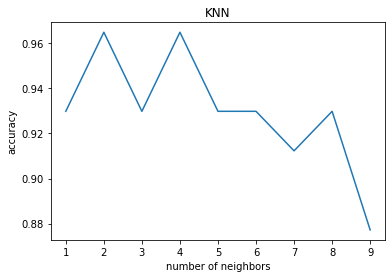

In [115]:
#Train KNN classifier, use test data to figure out optimal number of clusters (should be 2?)
scores = []
neighbors = range(1,10)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    results = knn.score(X_test,y_test)
    scores.append(results)

plt.plot(neighbors,scores)
plt.title('KNN')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')

In [116]:
#Choose KNN with n_neighbors = 4
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)
result = knn.score(X_validate,y_validate)
print("Accuracy = ",result)

Accuracy =  0.9298245614035088


In [117]:
predictions = knn.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[34  1]
 [ 3 19]]


Text(0, 0.5, 'accuracy')

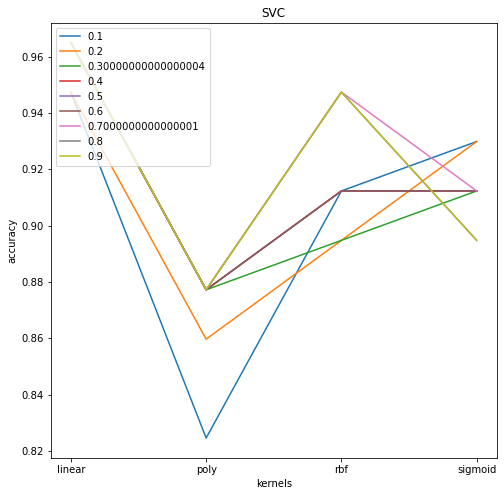

In [118]:
#Train SVC classifier, use test data to figure iterating over both regularization and kernels
scores = np.zeros([9,4])
regularization = np.arange(0.1, 1.0, 0.1)
kernels=['linear', 'poly', 'rbf', 'sigmoid']

for c in np.arange(len(regularization)):
    for k in np.arange(len(kernels)):
        svc = SVC(C=regularization[c],kernel=kernels[k],gamma='auto').fit(X_train,y_train)
        results = svc.score(X_test,y_test)
        scores[c,k]=results
        

plt.figure(figsize=(8,8))
for c in np.arange(len(regularization)):
    plt.plot(kernels,scores[c,:],label=regularization[c])
plt.title('SVC')
plt.legend(loc='upper left')
plt.xlabel('kernels')
plt.ylabel('accuracy')

In [119]:
#Best performing SVC seems to be kernel="linear", C = 0.9
svc = SVC(C=0.9,kernel='linear',gamma='auto').fit(X_train,y_train)
result = svc.score(X_validate,y_validate)
print("Accuracy = ",result)

Accuracy =  0.9298245614035088


In [120]:
predictions = svc.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[33  2]
 [ 2 20]]


Text(0.5, 1.0, 'Random Forest Classifier')

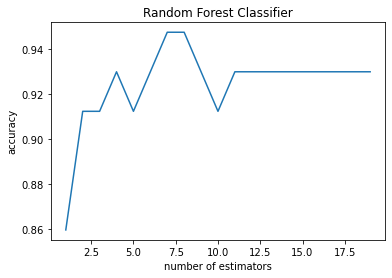

In [121]:
#Define Random Forest and estimate accuracy with number estimators
scores = []
num_estimators = range(1,20)

for n in num_estimators:
    forest = RandomForestClassifier(criterion='entropy', n_estimators = n, random_state=0)
    forest.fit(X_train, y_train)
    results = forest.score(X_test,y_test)
    scores.append(results)
    
plt.plot(num_estimators,scores)
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.title('Random Forest Classifier')

In [122]:
#Best performing forest has n_estimators=7
forest = RandomForestClassifier(criterion='entropy',n_estimators=7,random_state=0).fit(X_train,y_train)
result = forest.score(X_validate,y_validate)
print("Accuracy = ",result)

Accuracy =  0.9473684210526315


In [123]:
#Print confusion matrix using validation set
predictions = forest.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate,predictions))

Confusion Matrix: 
 [[34  1]
 [ 2 20]]


Comment: Best performing model that meets the performance criterion of accuracy > 94% is the Random Forest Classifier with 7 estimators run on the reduced dataset I created in mini project 3.  This dataset includes all main features, excluding the "standard error" and "worst" features of the original dataset.